In [481]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


In [482]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load Test

In [483]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [484]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [485]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [486]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [487]:
train_data["Title"] = train_data["Name"].str.extract(r",\s*([^\.]*)\.")
test_data["Title"] = test_data["Name"].str.extract(r",\s*([^\.]*)\.")

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_33212\2432131351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")


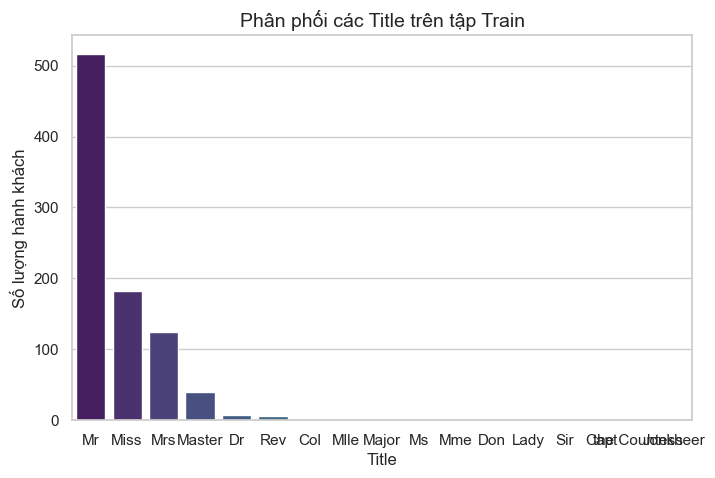

In [488]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")

plt.title("Phân phối các Title trên tập Train", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.show()

In [489]:
train_data['Title'] = train_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train_data['Title'] = train_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
test_data['Title'] = test_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
test_data['Title'] = test_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_33212\3021317157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")


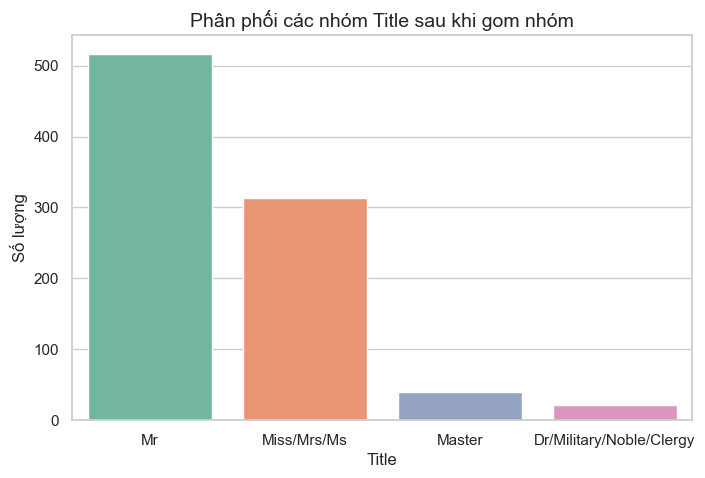

In [490]:
plt.figure(figsize=(8,5))
sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")
plt.title("Phân phối các nhóm Title sau khi gom nhóm", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng")
plt.show()

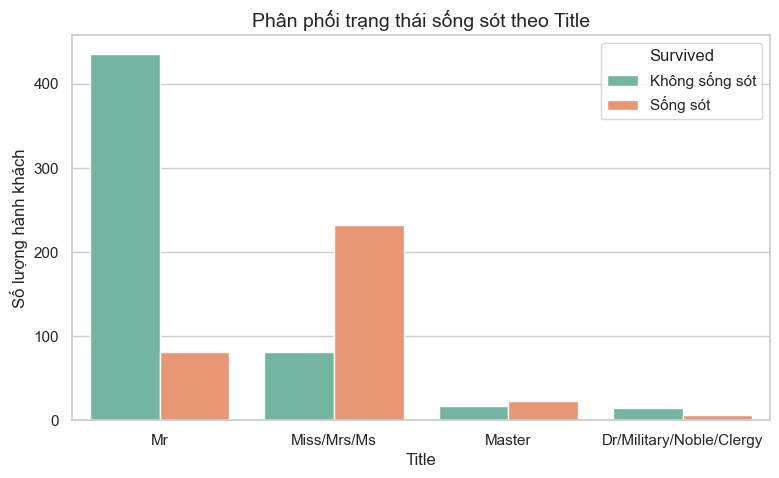

In [491]:
plt.figure(figsize=(9, 5))
sns.countplot(
    data=train_data,
    x="Title",
    hue="Survived",
    palette="Set2",
    order=train_data["Title"].value_counts().index
)

plt.title("Phân phối trạng thái sống sót theo Title", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.legend(title="Survived", labels=["Không sống sót", "Sống sót"])
plt.show()

In [492]:
train_data['Married'] = train_data['Title'].apply(lambda x: 1 if x in ['Mr', 'Mrs'] else 0)
test_data['Married'] = test_data['Title'].apply(lambda x: 1 if x in ['Mr', 'Mrs'] else 0)

In [493]:
train_data["LastName"] = train_data["Name"].apply(lambda x: x.split(",")[0].strip())
test_data["LastName"] = test_data["Name"].apply(lambda x: x.split(",")[0].strip())

In [494]:
train_data["LastName"].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: LastName, dtype: object

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_33212\258540359.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surname_counts.head(20).index, y=surname_counts.head(20).values, palette="viridis")


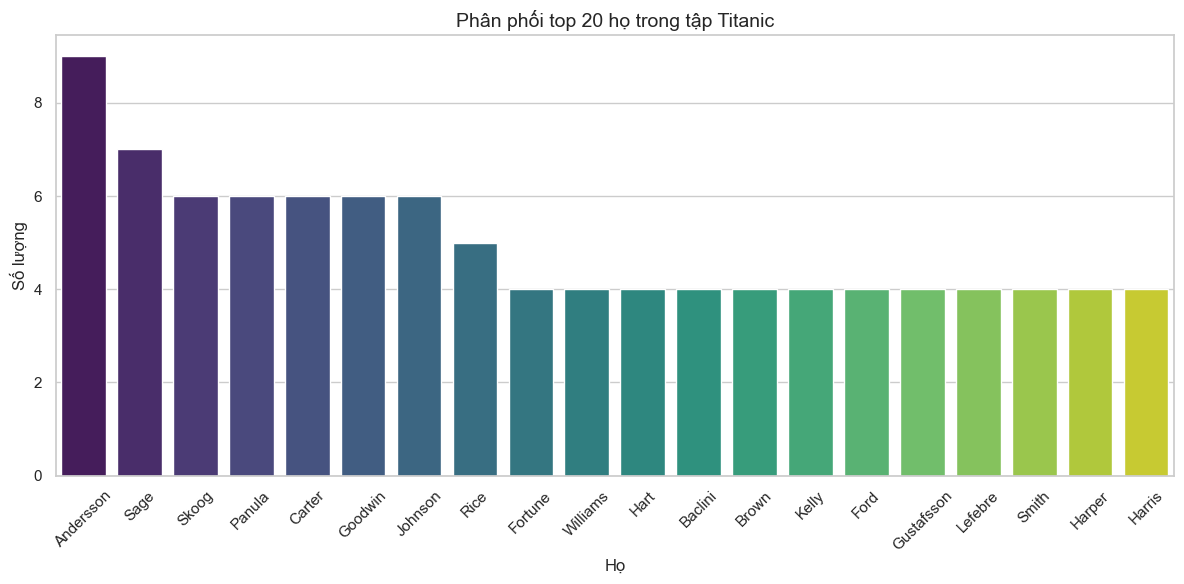

In [495]:
surname_counts = train_data["LastName"].value_counts()


# Vẽ biểu đồ top 20 họ
plt.figure(figsize=(12,6))
sns.barplot(x=surname_counts.head(20).index, y=surname_counts.head(20).values, palette="viridis")

plt.title("Phân phối top 20 họ trong tập Titanic", fontsize=14)
plt.xlabel("Họ", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [496]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

# train_data.drop(columns=['Ticket'], inplace=True)
# test_data.drop(columns=['Ticket'], inplace=True)

train_data.drop(columns=['PassengerId', "Name"], inplace=True)
test_data.drop(columns=['PassengerId', "Name"], inplace=True)

In [497]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [498]:
train_data.insert(loc=len(train_data.columns), column="Deck", value="")
test_data.insert(loc=len(test_data.columns), column="Deck", value="")

train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")
test_data['Deck'] = test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")

In [499]:
test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby('Title')['Age'].transform('mean')
)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [500]:
pclass_survive = pd.crosstab(train_data["Deck"], train_data["Survived"])
pclass_survive

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


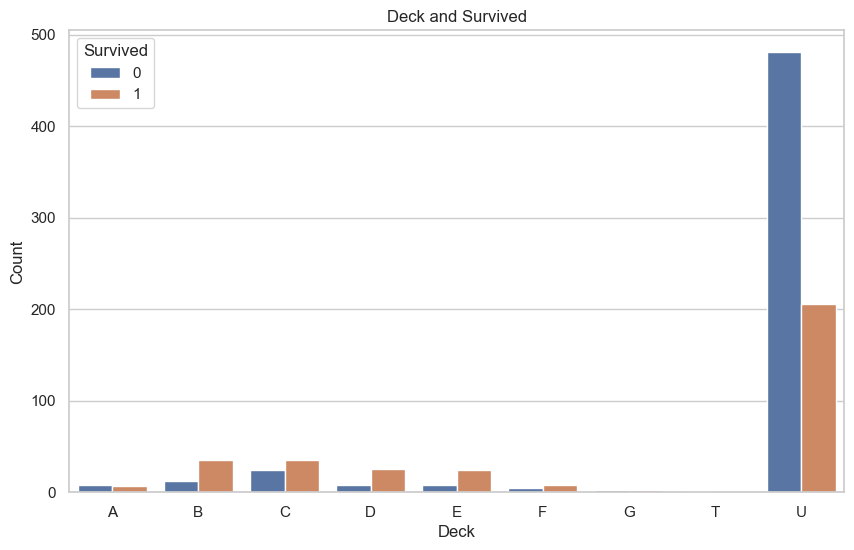

In [501]:
pclass_long = (
    pclass_survive
    .reset_index()               
    .melt(id_vars="Deck",        
          var_name="Survived",   
          value_name="Count") 
)
plt.figure(figsize=(10,6))
sns.barplot(data=pclass_long, x="Deck", y="Count", hue="Survived")

plt.title("Deck and Survived")
plt.ylabel("Count")
plt.xlabel("Deck")
plt.legend(title="Survived")
plt.show()

In [502]:
print(train_data["Deck"].isna().sum())
print(test_data["Deck"].isna().sum())

0
0


In [503]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

864
327


In [504]:
# Output percentage
pclass_survive_percentage = pclass_survive.div(pclass_survive.sum(axis=1), axis=0) * 100
pclass_survive_percentage

Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
U,70.014556,29.985444


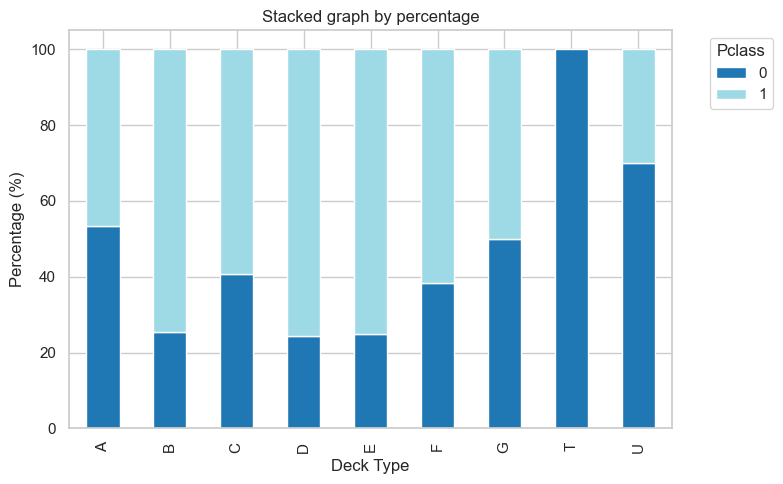

In [505]:
sns.set_theme(style="whitegrid")
ax = pclass_survive_percentage.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab20")

plt.ylabel("Percentage (%)")
plt.xlabel("Deck Type")
plt.title("Stacked graph by percentage")
plt.legend(title="Pclass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [506]:
train_data["Deck"] = train_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
train_data["Deck"] = train_data["Deck"].replace(["D", "E"], "Group 2")
train_data["Deck"] = train_data["Deck"].replace(["F", "G"], "Group 3")
train_data["Deck"] = train_data["Deck"].replace(["U"], "Group 4")

test_data["Deck"] = test_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
test_data["Deck"] = test_data["Deck"].replace(["D", "E"], "Group 2")
test_data["Deck"] = test_data["Deck"].replace(["F", "G"], "Group 3")
test_data["Deck"] = test_data["Deck"].replace(["U"], "Group 4")

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Married,LastName,Deck
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,Group 4
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Miss/Mrs/Ms,0,Cumings,Group 1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss/Mrs/Ms,0,Heikkinen,Group 4
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Miss/Mrs/Ms,0,Futrelle,Group 1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Allen,Group 4


In [507]:
train_data.drop(columns="Cabin", inplace=True)
test_data.drop(columns="Cabin", inplace=True)

In [508]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
Married     0
LastName    0
Deck        0
dtype: int64

In [509]:
train_data['Age'] = train_data['Age'].fillna(
    train_data.groupby('Title')['Age'].transform('mean')
)
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())

test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby('Title')['Age'].transform('mean')
)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [510]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch'] + 1

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_33212\1326782431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_Size', data=train_data, palette='viridis')


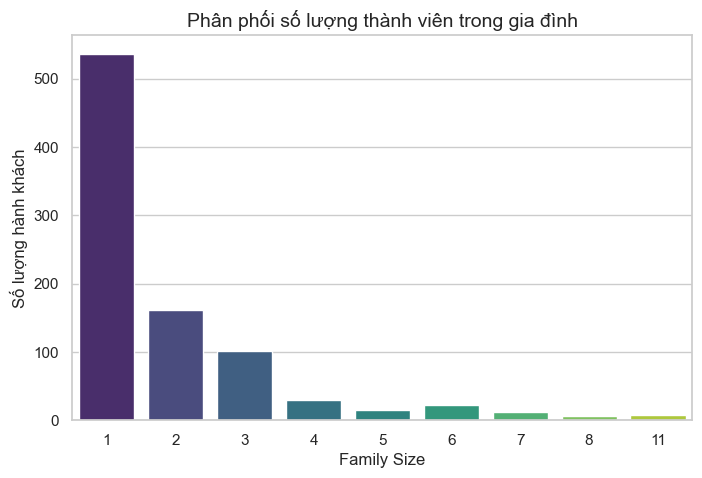

In [511]:
plt.figure(figsize=(8,5))
sns.countplot(x='Family_Size', data=train_data, palette='viridis')

plt.title('Phân phối số lượng thành viên trong gia đình', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Family_Size',
    hue='Survived',
    data=train_data,
    palette='coolwarm'
)

plt.title('Phân phối Family Size theo tình trạng sống sót', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Survived', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [ ]:
train_data['Family_Size_Grouped'] = np.select(
    [
        train_data['Family_Size'] == 1,
        train_data['Family_Size'].isin([2, 3, 4]),
        train_data['Family_Size'].isin([5, 6]),
        train_data['Family_Size'].isin([7, 8, 11])
    ],
    ['Single', 'Small', 'Medium', 'Large'],
    default='Other'
)

test_data['Family_Size_Grouped'] = np.select(
    [
        test_data['Family_Size'] == 1,
        test_data['Family_Size'].isin([2, 3, 4]),
        test_data['Family_Size'].isin([5, 6]),
        test_data['Family_Size'].isin([7, 8, 11])
    ],
    ['Single', 'Small', 'Medium', 'Large'],
    default='Other'
)

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_33212\1442379951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_Size_Grouped', data=train_data, palette='viridis')


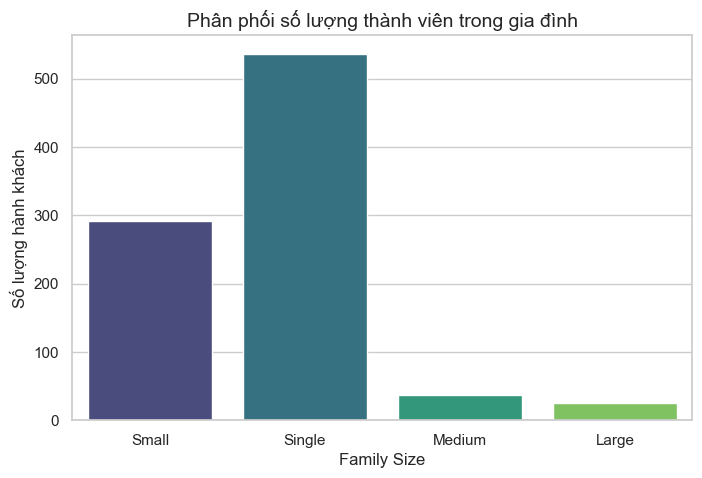

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Family_Size_Grouped', data=train_data, palette='viridis')

plt.title('Phân phối số lượng thành viên trong gia đình', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.show()

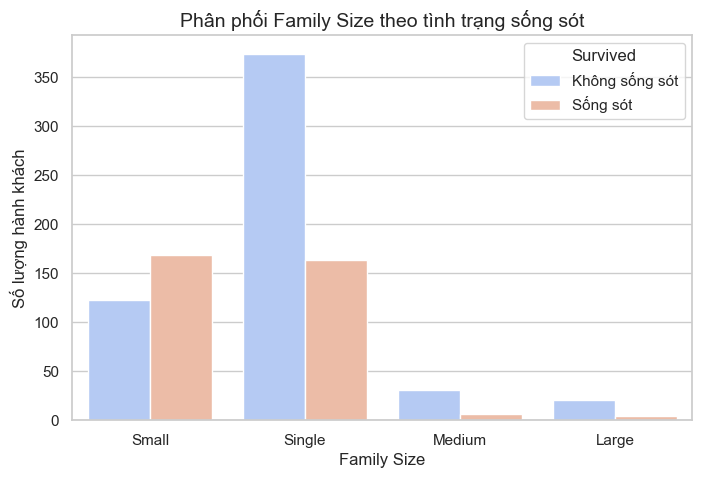

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Family_Size_Grouped',
    hue='Survived',
    data=train_data,
    palette='coolwarm'
)

plt.title('Phân phối Family Size theo tình trạng sống sót', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Survived', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [ ]:
train_data["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
train_data["Ticket_Counts"] = train_data.groupby('Ticket')['Ticket'].transform('count')
test_data["Ticket_Counts"] = test_data.groupby('Ticket')['Ticket'].transform('count')

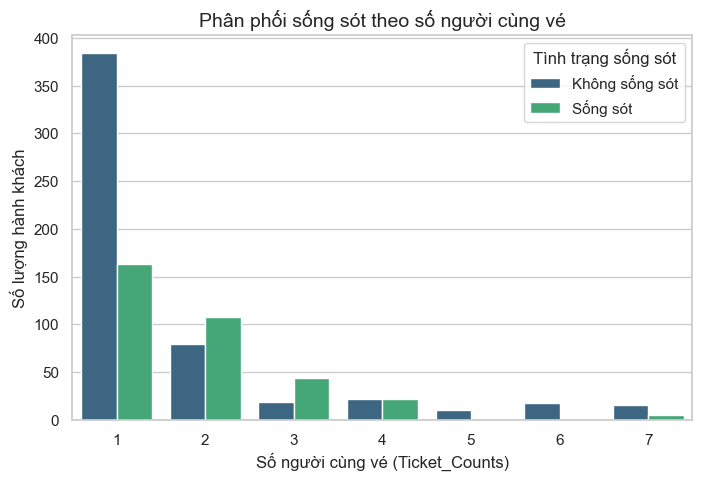

In [ ]:
train_data["Ticket_Counts"] = train_data.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(8,5))
sns.countplot(
    x='Ticket_Counts',
    hue='Survived',
    data=train_data,
    palette='viridis'
)

plt.title('Phân phối sống sót theo số người cùng vé', fontsize=14)
plt.xlabel('Số người cùng vé (Ticket_Counts)', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Tình trạng sống sót', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [ ]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

0
0


In [ ]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Sex', 'Ticket', 'Embarked', 'Title', 'LastName', 'Deck',
       'Family_Size_Grouped'],
      dtype='object')


In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Title', 'Married', 'LastName', 'Deck', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Counts'],
      dtype='object')

In [ ]:
train_data.drop(columns=["LastName", "Ticket"], inplace=True)
test_data.drop(columns=["LastName", "Ticket"], inplace=True)

In [ ]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked', "Deck", "Title", "Family_Size_Grouped"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked', "Deck", "Title", "Family_Size_Grouped"], drop_first=True)


In [ ]:
print(train_data.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Survived                    891 non-null    int64  
 1   Pclass                      891 non-null    int64  
 2   Sex                         891 non-null    int64  
 3   Age                         891 non-null    float64
 4   SibSp                       891 non-null    int64  
 5   Parch                       891 non-null    int64  
 6   Fare                        891 non-null    float64
 7   Married                     891 non-null    int64  
 8   Family_Size                 891 non-null    int64  
 9   Ticket_Counts               891 non-null    int64  
 10  Embarked_Q                  891 non-null    bool   
 11  Embarked_S                  891 non-null    bool   
 12  Deck_Group 2                891 non-null    bool   
 13  Deck_Group 3                891 non

Survived
0    549
1    342
Name: count, dtype: int64


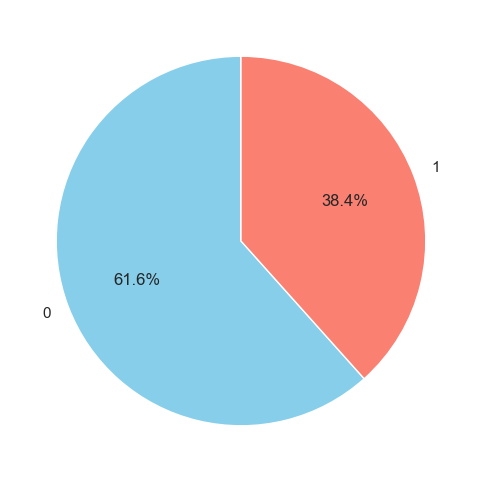

In [ ]:
counts = train_data["Survived"].value_counts()
print(counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Family_Size'}>],
       [<Axes: title={'center': 'Ticket_Counts'}>, <Axes: >, <Axes: >]],
      dtype=object)

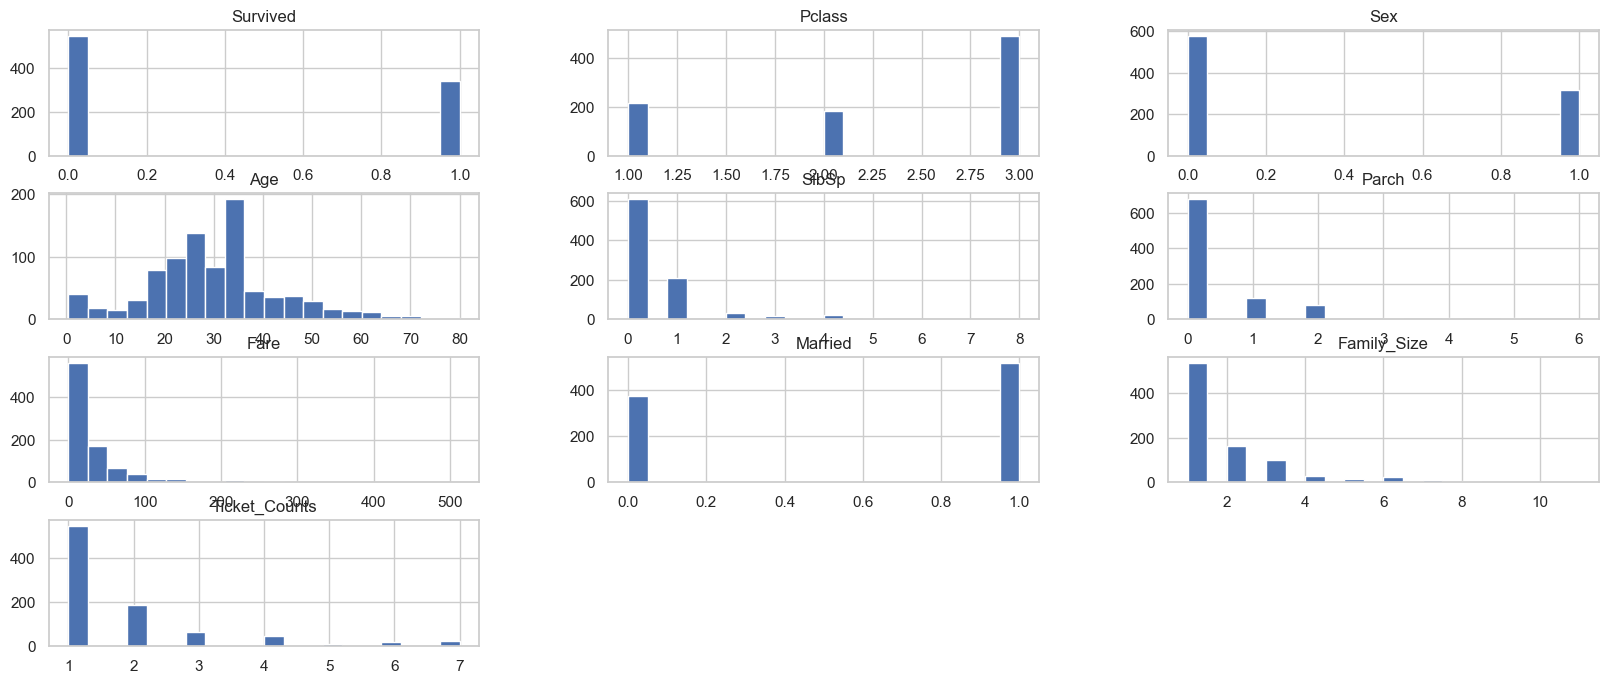

In [ ]:
train_data.hist(figsize=(20, 8), bins = 20, sharex = False, sharey = False)

In [ ]:
train_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Married',
       'Family_Size', 'Ticket_Counts', 'Embarked_Q', 'Embarked_S',
       'Deck_Group 2', 'Deck_Group 3', 'Deck_Group 4', 'Title_Master',
       'Title_Miss/Mrs/Ms', 'Title_Mr', 'Family_Size_Grouped_Medium',
       'Family_Size_Grouped_Single', 'Family_Size_Grouped_Small'],
      dtype='object')

Survived            Axes(0.125,0.653529;0.133621x0.226471)
Pclass           Axes(0.285345,0.653529;0.133621x0.226471)
Sex               Axes(0.44569,0.653529;0.133621x0.226471)
Age              Axes(0.606034,0.653529;0.133621x0.226471)
SibSp            Axes(0.766379,0.653529;0.133621x0.226471)
Parch               Axes(0.125,0.381765;0.133621x0.226471)
Fare             Axes(0.285345,0.381765;0.133621x0.226471)
Married           Axes(0.44569,0.381765;0.133621x0.226471)
Family_Size      Axes(0.606034,0.381765;0.133621x0.226471)
Ticket_Counts    Axes(0.766379,0.381765;0.133621x0.226471)
dtype: object

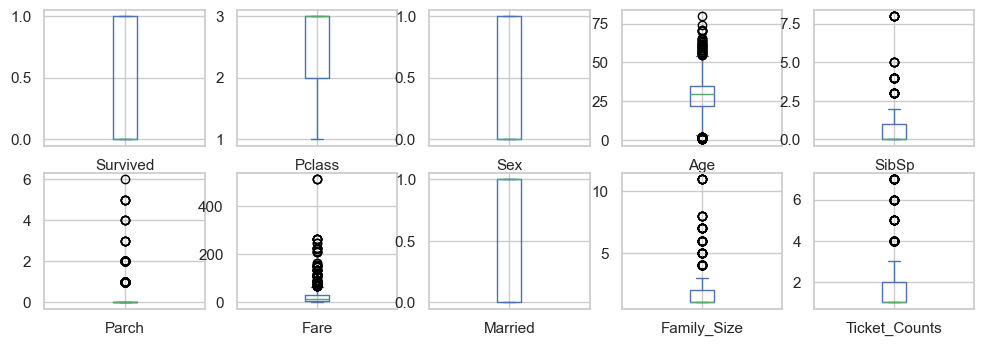

In [ ]:
train_data.plot(kind="box", subplots=True, layout=(3, 5), sharex=False, sharey=False, figsize=(12,6))

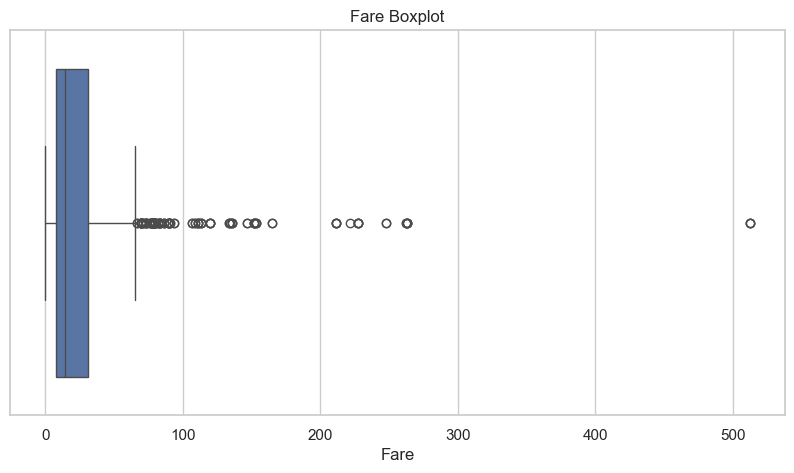

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Boxplot')
plt.show()

In [ ]:
train_data['Fare'] = train_data['Fare'].apply(np.log1p)
test_data['Fare'] = test_data['Fare'].apply(np.log1p)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Married,Family_Size,Ticket_Counts,...,Embarked_S,Deck_Group 2,Deck_Group 3,Deck_Group 4,Title_Master,Title_Miss/Mrs/Ms,Title_Mr,Family_Size_Grouped_Medium,Family_Size_Grouped_Single,Family_Size_Grouped_Small
0,0,3,0,-0.596614,1,0,-0.879741,1,2,1,...,True,False,False,True,False,False,True,False,False,True
1,1,1,1,0.619379,1,0,1.361220,0,2,1,...,False,False,False,False,False,True,False,False,False,True
2,1,3,1,-0.292616,0,0,-0.798540,0,1,1,...,True,False,False,True,False,True,False,False,True,False
3,1,1,1,0.391381,1,0,1.062038,0,2,2,...,True,False,False,False,False,True,False,False,False,True
4,0,3,0,0.391381,0,0,-0.784179,1,1,1,...,True,False,False,True,False,False,True,False,True,False


<Axes: >

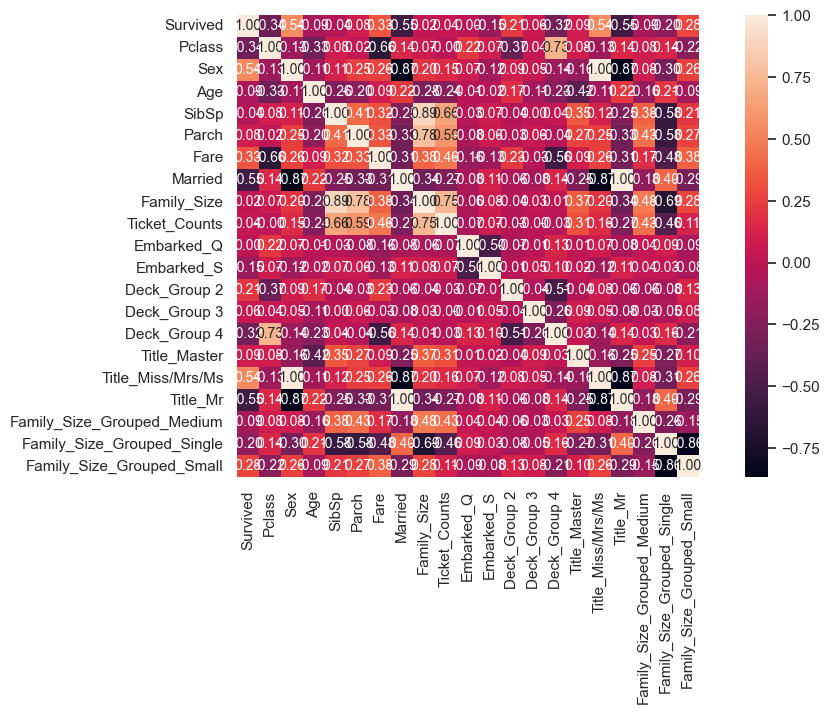

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

corrMat = train_data.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)


In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance


models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
    "SVC": SVC(
        kernel="rbf",     
        probability=True,
        random_state=42,
    ),
    "K-Neighbours": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42)
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Vòng lặp qua từng model
for name, model in models.items():
    acc_scores, f1_scores, roc_auc_scores = [], [], []

    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)[:, 1]

        acc_scores.append(accuracy_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred))
        roc_auc_scores.append(roc_auc_score(y_val, y_prob))

    print(f"{name} Results (5-Fold CV):")
    print(f"  Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"  F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"  ROC AUC:  {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
    print("-" * 40)



Logistic Regression Results (5-Fold CV):
  Accuracy: 0.8294 ± 0.0107
  F1 Score: 0.7754 ± 0.0171
  ROC AUC:  0.8779 ± 0.0178
----------------------------------------
Random Forest Results (5-Fold CV):
  Accuracy: 0.8148 ± 0.0228
  F1 Score: 0.7534 ± 0.0294
  ROC AUC:  0.8743 ± 0.0271
----------------------------------------
XGBoost Results (5-Fold CV):
  Accuracy: 0.8260 ± 0.0255
  F1 Score: 0.7670 ± 0.0332
  ROC AUC:  0.8762 ± 0.0244
----------------------------------------
SVC Results (5-Fold CV):
  Accuracy: 0.8305 ± 0.0140
  F1 Score: 0.7711 ± 0.0218
  ROC AUC:  0.8770 ± 0.0164
----------------------------------------
K-Neighbours Results (5-Fold CV):
  Accuracy: 0.8024 ± 0.0255
  F1 Score: 0.7386 ± 0.0353
  ROC AUC:  0.8538 ± 0.0286
----------------------------------------
Decision Tree Results (5-Fold CV):
  Accuracy: 0.8058 ± 0.0222
  F1 Score: 0.7482 ± 0.0302
  ROC AUC:  0.8553 ± 0.0197
----------------------------------------


In [ ]:
best_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50, max_depth=7)
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))


Actual values (first 10):
1     1
5     0
7     0
8     1
11    1
12    0
17    1
25    1
32    1
37    0
Name: Survived, dtype: int64

Predicted values (first 10):
0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    0
dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       109
           1       0.79      0.83      0.81        69

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

Confusion Matrix:
[[94 15]
 [12 57]]


In [ ]:
# Re-create the original dataset.
test_data_orig = pd.read_csv("./kaggle/input/titanic/test.csv")

# Get the predicted data from test
test_preds = best_model.predict(test_data)

# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
